## Portfolio Optimization
---
In this project we manage a portfolio of three South African stocks. We use one year data for the closing price of each stock starting on 19 January 2025 to 18 January 2026. Our aim is to see how well a portfolio with the given stocks will perfom in 5 months time, that is in on 18 June 2026. The analysis can be extended to the each of each months.

The three stocks included are the below, all listed on the Johannesburg Stock Exchange. Each stock was chopped into 5000 data points and saved as an csv file. All data is obtained from [www.investing.com](https://investing.com)


*   Rand Merchant Bank
*   Old Mutual
*   Gold Fields

This project involved firstly EDA to understand the distributions and statistical attributes of the datasets. Certain insights may be noted at this stage. Then we build ARIMA and Neural Network models to forecast each stock 5 months ahead. Monte Carlo simulation may also be used in EXCEL for portfolio stress testing.










## Step 1: Data Preparation
---
* Manipulating the data into a format proper for analysing and modelling.
* Ensuring observations are changed from percentage points to closing prices in ZAR



In [1]:
# Import the necessary libraries
import pandas as pnd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
First_Rand_Stock = pnd.read_csv("First Rand Stock.csv")
Old_Mutual_Stock = pnd.read_csv("Old Mutual Stock.csv")
Rand_Merchant_Bank_Stock = pnd.read_csv("Rand Merchant Bank Stock.csv")

In [3]:
df_first_rand = First_Rand_Stock.copy()
df_old_mutual = Old_Mutual_Stock.copy()
df_rand_merch = Rand_Merchant_Bank_Stock.copy()

# Add additional column for overall consistecy (Index column)
df_first_rand['DataPoint'] = range(1, len(df_first_rand) + 1)
df_old_mutual['DataPoint'] = range(1, len(df_old_mutual) + 1)

In [ ]:
df_first_rand.head()

,Date,Price,DataPoint
0,2015-01-01,100.0000,1
1,2015-01-02,100.4174,2
2,2015-01-05,100.3264,3
3,2015-01-06,100.8663,4
4,2015-01-07,102.1154,5


In [4]:
df_first_rand = df_first_rand.drop(['Date'], axis=1)
df_old_mutual = df_old_mutual.drop(['Date'], axis=1)

In [ ]:
df_first_rand.head()

,Price,DataPoint
0,100.0000,1
1,100.4174,2
2,100.3264,3
3,100.8663,4
4,102.1154,5


In [ ]:
df_old_mutual.head()

,Price,DataPoint
0,100.0000,1
1,99.2082,2
2,98.6250,3
3,99.3670,4
4,100.0550,5


In [ ]:
df_rand_merch.tail()

,DataPoint,Normalized_X,Normalized_Y,Percentage_Value,Index_0_100
4995,4996,0.9992,0.987731,98.773088,98.773088
4996,4997,0.9994,0.990798,99.079816,99.079816
4997,4998,0.9996,0.993865,99.386544,99.386544
4998,4999,0.9998,0.996933,99.693272,99.693272
4999,5000,1.0000,1.000000,100.000000,100.000000


In [5]:
df_rand_merch = df_rand_merch.drop(['Normalized_X', 'Normalized_Y', 'Index_0_100'], axis=1)

In [ ]:
df_rand_merch.head()

,DataPoint,Percentage_Value
0,1,40.718563
1,2,40.718563
2,3,40.718563
3,4,40.718563
4,5,40.718563


In [6]:
# Now that all dataframes have "price" and dapoint so we can merge them together

data_stocks = pnd.merge(df_old_mutual, df_first_rand, on='DataPoint')

In [7]:
stocks_data = pnd.merge(data_stocks, df_rand_merch, on='DataPoint')

In [8]:
stocks_data['Time Index'] = stocks_data['DataPoint']
stocks_data['First Rand Ltd_i'] = stocks_data['Price_y']
stocks_data['Old Mutual_i'] = stocks_data['Price_x']
stocks_data['Rand Merchant Bank_i'] = stocks_data['Percentage_Value']

In [9]:
stocks_data = stocks_data.drop(['Price_x', 'Price_y','Percentage_Value'], axis=1)

In [10]:
stocks_data = stocks_data.drop(['DataPoint'], axis=1)

In [ ]:
stocks_data.head()

,Time Index,First Rand Ltd_i,Old Mutual_i,Rand Merchant Bank_i
0,1,100.0000,100.0000,40.718563
1,2,100.4174,99.2082,40.718563
2,3,100.3264,98.6250,40.718563
3,4,100.8663,99.3670,40.718563
4,5,102.1154,100.0550,40.718563


In [ ]:
stocks_data.tail()

,Time Index,First Rand Ltd_i,Old Mutual_i,Rand Merchant Bank_i
4995,4996,5648.1571,568.5216,98.773088
4996,4997,5657.2183,557.9685,99.079816
4997,4998,5700.7126,553.4129,99.386544
4998,4999,5854.0691,559.6971,99.693272
4999,5000,5903.6138,565.5460,100.000000


In [ ]:
stocks_data.describe()

,Time Index,First Rand Ltd_i,Old Mutual_i,Rand Merchant Bank_i
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1178.293249,302.987017,36.316942
std,1443.520003,1169.803982,186.401288,27.752506
min,1.000000,91.398200,54.354900,0.010022
25%,1250.750000,203.239000,117.226625,19.560878
50%,2500.500000,743.284250,277.513850,24.675431
75%,3750.250000,1909.834075,473.631325,48.625825
max,5000.000000,5903.613800,612.126500,100.000000


Data Manipulation: The data is not in closing prices but the trend is correct. We need to calibrate the magnitudes into closing prices withouth altering the trajectory.

In [11]:
# Multiplying by a constant will not change the directory

stocks_data['Rand Merchant Bank'] = (47/100) * stocks_data['Rand Merchant Bank_i']
stocks_data['Gold Fields'] = (85780/5903.613800) * stocks_data['First Rand Ltd_i']
stocks_data['Old Mutual'] = (1520/565.560) * stocks_data['Old Mutual_i']

In [12]:
stocks_data = stocks_data.drop(['Rand Merchant Bank_i', 'First Rand Ltd_i', 'Old Mutual_i'], axis=1)

In [13]:
stocks_data.head()

,Time Index,Rand Merchant Bank,Gold Fields,Old Mutual
0,1,19.137725,1453.008325,268.760167
1,2,19.137725,1459.073182,266.632124
2,3,19.137725,1457.750944,265.064715
3,4,19.137725,1465.595736,267.058915
4,5,19.137725,1483.745263,268.907985


In [14]:
stocks_data.tail()

,Time Index,Rand Merchant Bank,Gold Fields,Old Mutual
4995,4996,46.423351,82068.192882,1527.959601
4996,4997,46.567514,82199.852872,1499.597072
4997,4998,46.711676,82831.828672,1487.353434
4998,4999,46.855838,85060.111384,1504.242860
4999,5000,47.000000,85780.000000,1519.962374


## Step 2: Exploratory Data Analysis
---
*   Includes veiwing trajectories of the stocks and taking note of significant features of each stock.
*   Establising associations between stocks using hypothesis testing (Anova).


In [15]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time Index          5000 non-null   int64  
 1   Rand Merchant Bank  5000 non-null   float64
 2   Gold Fields         5000 non-null   float64
 3   Old Mutual          5000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 156.4 KB


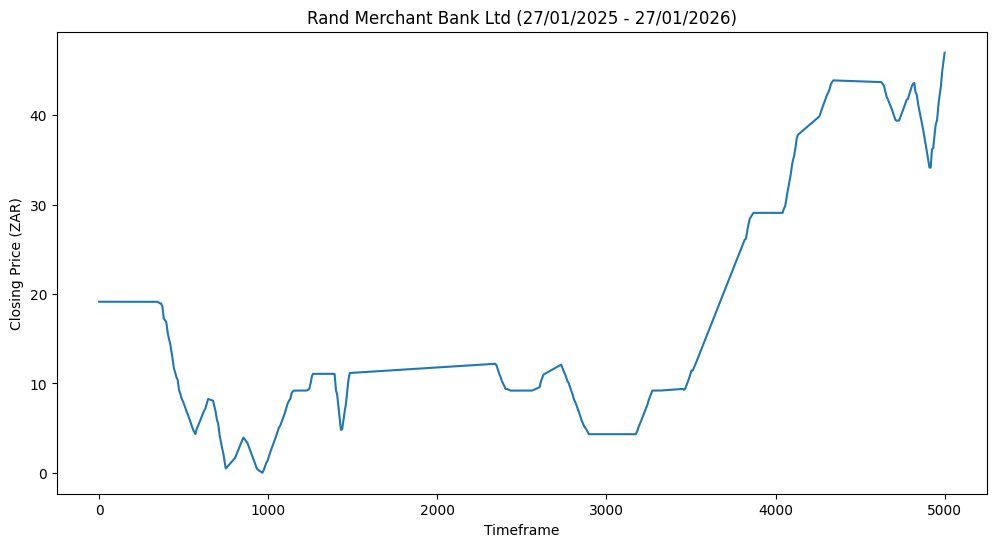

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Index', y='Rand Merchant Bank', data=stocks_data)
plt.title('Rand Merchant Bank Ltd (27/01/2025 - 27/01/2026)')
plt.xlabel('Timeframe')
plt.ylabel('Closing Price (ZAR)')
plt.grid(False)
plt.show()


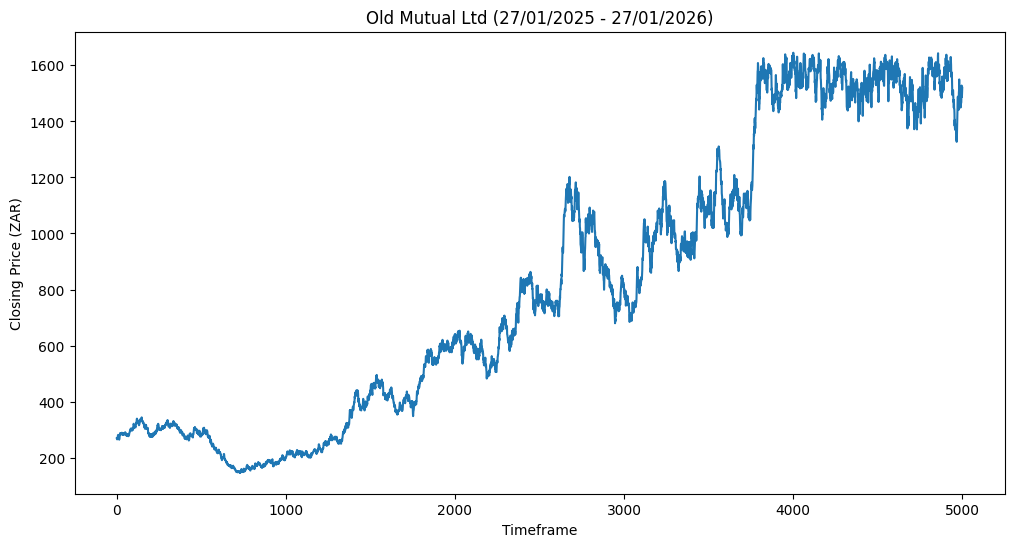

In [17]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Index', y='Old Mutual', data=stocks_data)
plt.title('Old Mutual Ltd (27/01/2025 - 27/01/2026)')
plt.xlabel('Timeframe')
plt.ylabel('Closing Price (ZAR)')
plt.grid(False)
plt.show()

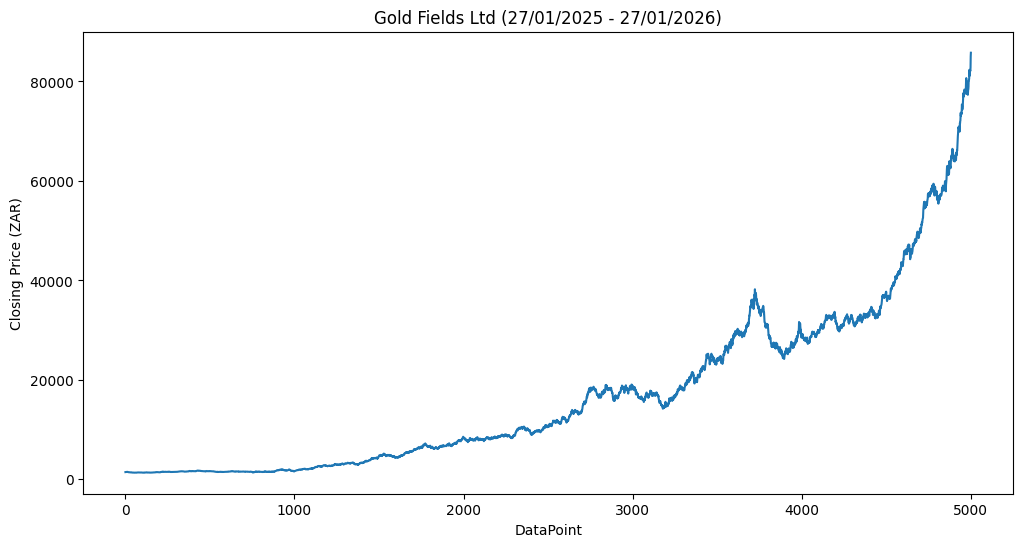

In [20]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Index', y='Gold Fields', data= stocks_data)
plt.title('Gold Fields Ltd (27/01/2025 - 27/01/2026)')
plt.xlabel('DataPoint')
plt.ylabel('Closing Price (ZAR)')
plt.grid(False)
plt.show()


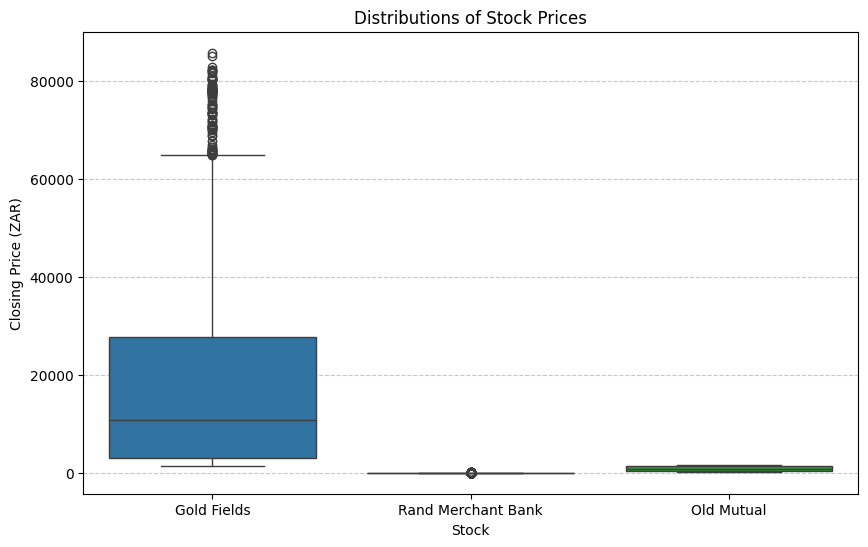

In [21]:
# Visualize the similarities in the Box and whisker plots

plt.figure(figsize=(10, 6))
sns.boxplot(data=stocks_data[['Gold Fields', 'Rand Merchant Bank', 'Old Mutual']])
plt.title('Distributions of Stock Prices')
plt.ylabel('Closing Price (ZAR)')
plt.xlabel('Stock')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


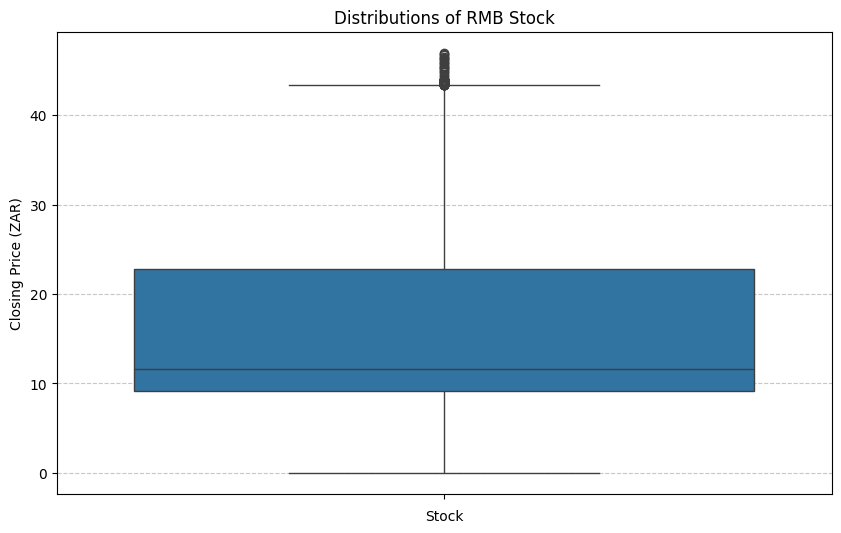

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stocks_data['Rand Merchant Bank'])
plt.title('Distributions of RMB Stock')
plt.ylabel('Closing Price (ZAR)')
plt.xlabel('Stock')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

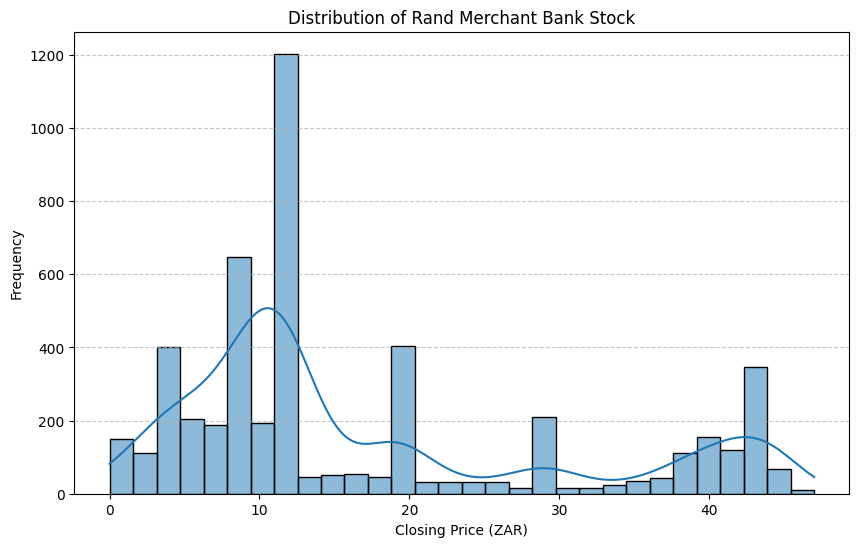

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(stocks_data['Rand Merchant Bank'], bins=30, kde=True)
plt.title('Distribution of Rand Merchant Bank Stock')
plt.xlabel('Closing Price (ZAR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


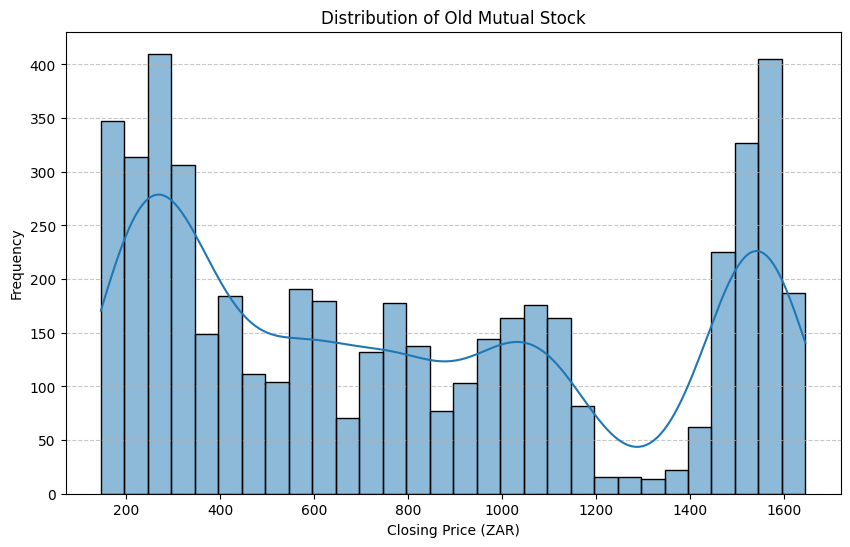

In [24]:

plt.figure(figsize=(10, 6))
sns.histplot(stocks_data['Old Mutual'], bins=30, kde=True)
plt.title('Distribution of Old Mutual Stock')
plt.xlabel('Closing Price (ZAR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


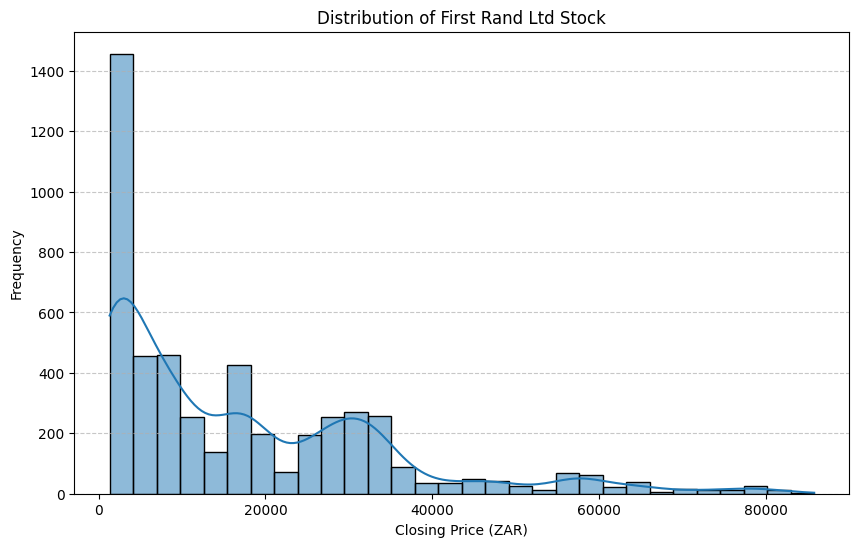

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(stocks_data['Gold Fields'], bins=30, kde=True)
plt.title('Distribution of First Rand Ltd Stock')
plt.xlabel('Closing Price (ZAR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [29]:
from ipywidgets.widgets.widget import CONTROL_PROTOCOL_VERSION_MAJOR

print('--- First Rand Ltd Stock Statistics ---')
print(f"Mean: {stocks_data['Gold Fields'].mean():.2f}")
print(f"Variance: {stocks_data['Gold Fields'].var():.2f}")
print(f"Kurtosis: {stocks_data['Gold Fields'].kurt():.2f}")

print('\n--- Rand Merchant Bank Stock Statistics ---')
print(f"Mean: {stocks_data['Rand Merchant Bank'].mean():.2f}")
print(f"Variance: {stocks_data['Rand Merchant Bank'].var():.2f}")
print(f"Kurtosis: {stocks_data['Rand Merchant Bank'].kurt():.2f}")

print('\n--- Old Mutual Statistics ---')
print(f"Mean: {stocks_data['Old Mutual'].mean():.2f}")
print(f"Variance: {stocks_data['Old Mutual'].var():.2f}")
print(f"Kurtosis: {stocks_data['Old Mutual'].kurt():.2f}")


print('\n--- Correlation coefficients ---')
corrab = stocks_data['Rand Merchant Bank'].corr(stocks_data['Gold Fields'])
corrac = stocks_data['Rand Merchant Bank'].corr(stocks_data['Old Mutual'])
corrcb = stocks_data['Old Mutual'].corr(stocks_data['Gold Fields'])
print(f"Correlation between Gold Fields and Rand Merchant Bank: {corrab:.2f}")
print(f"Correlation between Rand Merchant Bank and Old Mutual: {corrab:.2f}")
print(f"Correlation between Old Mutual and Gold Fields: {corrab:.2f}")


--- First Rand Ltd Stock Statistics ---
Mean: 17120.70
Variance: 288909881.42
Kurtosis: 1.70

--- Rand Merchant Bank Stock Statistics ---
Mean: 17.07
Variance: 170.14
Kurtosis: -0.39

--- Old Mutual Statistics ---
Mean: 814.31
Variance: 250973.36
Kurtosis: -1.35

--- Correlation coefficients ---
Correlation between Gold Fields and Rand Merchant Bank: 0.79
Correlation between Rand Merchant Bank and Old Mutual: 0.79
Correlation between Old Mutual and Gold Fields: 0.79


In [30]:
# View the variance, covariance matrix
var_cov_matrix = stocks_data[['Rand Merchant Bank', 'Gold Fields', 'Old Mutual']].cov()
display(var_cov_matrix)

,Rand Merchant Bank,Gold Fields,Old Mutual
Rand Merchant Bank,170.137530,1.741606e+05,5.067728e+03
Gold Fields,174160.555306,2.889099e+08,7.421843e+06
Old Mutual,5067.728275,7.421843e+06,2.509734e+05


## Step 3: Modelling
---
* Here we build predictive models for each stock.
* The intention is to forecast 5 months into the future (until 27 June 2026).
* We use a unique Neural Networks for each stock.

In [31]:
# Create copy of the data for necessary manipaltions
nn_data = stocks_data.copy()

In [32]:
nn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time Index          5000 non-null   int64  
 1   Rand Merchant Bank  5000 non-null   float64
 2   Gold Fields         5000 non-null   float64
 3   Old Mutual          5000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 156.4 KB


In [34]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler objects for 'Time Index' and 'Rand Merchant Bank'
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape and fit-transform 'Time Index' and store in X_scaled
X_scaled = scaler_X.fit_transform(nn_data['Time Index'].values.reshape(-1, 1))

# Reshape and fit-transform 'Rand Merchant Bank' and store in y_scaled
y_scaled = scaler_y.fit_transform(nn_data['Rand Merchant Bank'].values.reshape(-1, 1))

print("Time Index (X_scaled) and Rand Merchant Bank (y_scaled) data standardized.")

Time Index (X_scaled) and Rand Merchant Bank (y_scaled) data standardized.


In [36]:
from sklearn.neural_network import MLPRegressor

# Instantiate MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(3, 4), solver='sgd', learning_rate_init=0.05, max_iter=2000, random_state=42)

# Train the model
mlp_model.fit(X_scaled, y_scaled.ravel())

print("MLPRegressor model built and trained successfully.")

MLPRegressor model built and trained successfully.


In [37]:
y_pred_scaled = mlp_model.predict(X_scaled)

print("Predictions on standardized data (y_pred_scaled) made successfully.")

Predictions on standardized data (y_pred_scaled) made successfully.


In [38]:
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print("Predictions inverse transformed back to original scale (y_pred) successfully.")

Predictions inverse transformed back to original scale (y_pred) successfully.


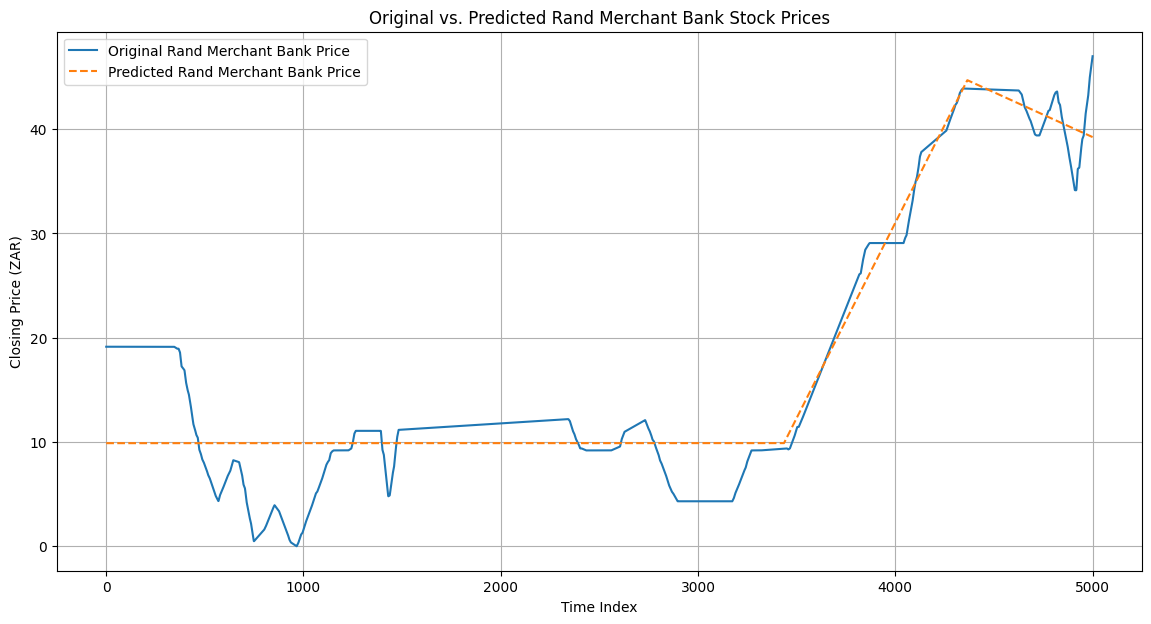

Visualization of original and predicted Rand Merchant Bank prices completed.


In [39]:
plt.figure(figsize=(14, 7))
plt.plot(nn_data['Time Index'], nn_data['Rand Merchant Bank'], label='Original Rand Merchant Bank Price')
plt.plot(nn_data['Time Index'], y_pred, label='Predicted Rand Merchant Bank Price', linestyle='--')
plt.title('Original vs. Predicted Rand Merchant Bank Stock Prices')
plt.xlabel('Time Index')
plt.ylabel('Closing Price (ZAR)')
plt.legend()
plt.grid(True)
plt.show()

print("Visualization of original and predicted Rand Merchant Bank prices completed.")